<a href="https://colab.research.google.com/github/ataberkkoroglu/Prediction-Of-Car-Price/blob/master/Prediction_Of_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np,seaborn as sns,tensorflow as tf,pandas as pd
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel("/content/drive/MyDrive/merc.xlsx")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB
None


In [3]:
df.select_dtypes("object")


,transmission
0,Automatic
1,Automatic
2,Automatic
3,Automatic
4,Automatic
...,...
13114,Automatic
13115,Automatic
13116,Automatic
13117,Automatic


In [4]:
plt.figure(figsize=(20,20)) #sns.set(rc={"figure.figsize":(20,20)})

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

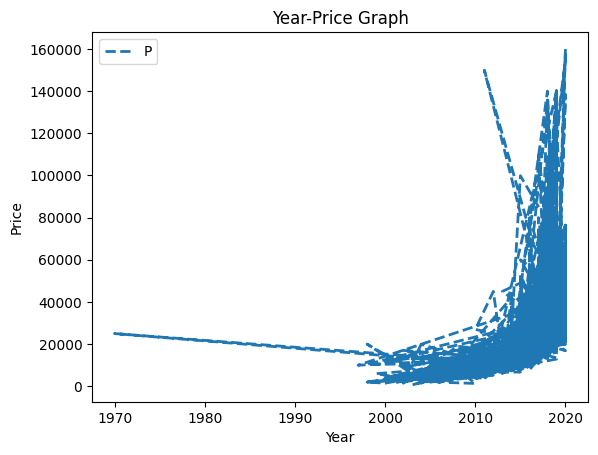

In [5]:
plt.plot(df["year"],df["price"],linewidth=2,linestyle="--")
plt.title("Year-Price Graph")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend("Price",loc=2)
plt.show()

In [ ]:
sns.scatterplot(x=df["year"],y=df["price"],color="b")

<Axes: xlabel='year', ylabel='price'>

In [ ]:
df["year"]

In [ ]:
df.loc[df["year"]<2000,"year"]=np.nan
df.dropna(axis=0,inplace=True)

In [ ]:
df["year"].value_counts().plot.bar().set_title("Year Of Cars")
plt.show()

In [ ]:
#detection outlier

columns=list()
for i in df.select_dtypes("integer").columns:
   columns.append(i)

for col in columns:
  df[col]=pd.to_numeric(df[col],errors="coerce")

  max_value=df[col].std()*3+df[col].mean()
  min_value=df[col].mean()-df[col].std()*3
  
  mean=df.loc[(df[col]>min_value) & (df[col]<max_value),col].mean()
  
  if mean is np.nan:
   mean = df[col].fillna(df[col].mean(),inplace=True) 
  else:
    df.loc[(df[col]>min_value) & (df[col]<max_value),col]=mean
  
  df[col].astype("float64")

In [ ]:
sns.histplot(df["year"],kde=True)

In [ ]:
df["transmission"]=df["transmission"].astype("category")
df.info()

In [ ]:
encoder=LabelEncoder()
df["transmission"]=encoder.fit_transform(df["transmission"].values)
df.head(10)

In [ ]:
pivot_table=pd.pivot_table(columns="year",values=["price","mileage","tax","mpg","engineSize","transmission"],data=df)
pivot_table

In [ ]:
x=df["price"].values
y=df.drop("price",axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=10)
len(X_train),len(Y_train),len(X_test),len(Y_test)

In [ ]:
Scaler=MinMaxScaler()
Y_train=X_train.reshape(4917,2)
Y_test=X_test.reshape(3278//2,2)
X_train=X_train.reshape(4917,2)
X_test=X_test.reshape(3278//2,2)
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)

X_train.shape,X_test.shape

In [ ]:
Callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=25,verbose=1)

In [ ]:
Model=Sequential()
Model.add(Dense(17,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(17,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(17,activation="relu"))

Model.add(Dense(units=2))

Model.compile(optimizer="adam",loss="mse")
Model.fit(x=X_train,y=Y_train,epochs=700,validation_data=(X_test,Y_test),callbacks=Callbacks)

In [ ]:
lossdata=pd.DataFrame(Model.history.history)
X_text=X_test.reshape(3278,1)
prediction=Model.predict(X_test,verbose=0)

print(f"MSE: {mean_squared_error(Y_test,prediction)/26224}")


In [ ]:
NewCarSeries=df.drop("price",axis=1).iloc[1]
print(df.iloc[1])
NewCarSeries=NewCarSeries.values
NewCarSeries=Scaler.transform(NewCarSeries.reshape(3,2))
price=df["price"].iloc[1]
print(f"Car Price : {price}")
print(f"Prediction: {np.max(Model.predict(NewCarSeries,verbose=0).reshape(1,6))}")